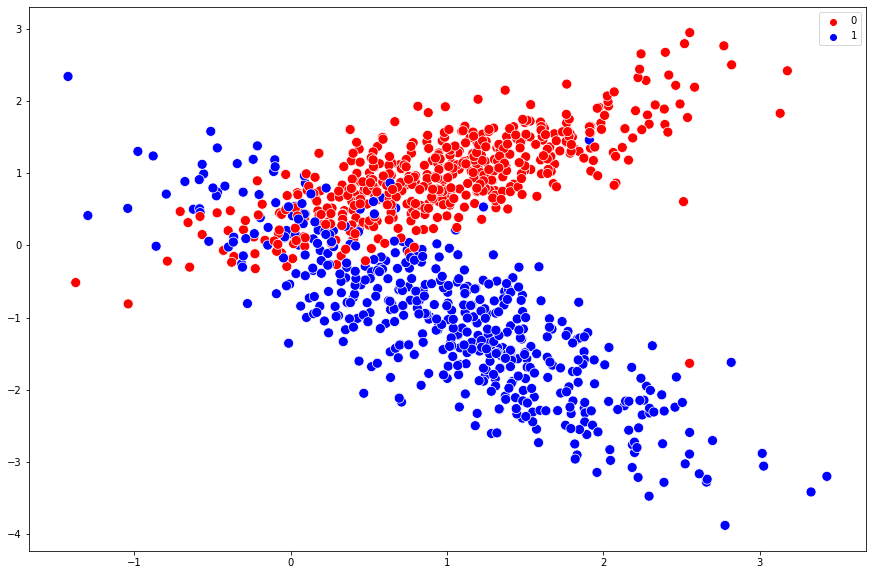

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

plt.figure(figsize=(15, 10))


sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette=["red", "blue"], s=100)

In [32]:
y.shape

(1000,)

In [121]:
import numpy as np
import json



# CLASS TO SERIALIZE NUMPY ARRAYS TO SAVE MODEL TO JSON
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
    
    

    
class Network(object):

    
    # initialize network
    def __init__(self):
        self.architecture = {}
        self.activation_funcs = {
            "relu" :    [self.relu, self.relu_prime],
            "softmax" : [self.softmax, self.softmax_prime],
            "sigmoid" : [self.sigmoid, self.sigmoid_prime],
            "identity": [self.identity, self.identity]
        }

            
    # INITIALIZE, LOAD AND SAVE MODEL--------
            
    def initialize_parameters(self, sizes, activations):
        np.random.seed(99)
        if len(sizes) -1 != len(activations):
            print("number of activations must be equal to number of layers - 1")
        else:
            for i in range(len(sizes) -1):
                self.architecture[str(i+1)] = {
                    "weights" : np.random.rand(sizes[i], sizes[i+1])* 0.1,
                    "bias" : np.random.rand(sizes[i+1])* 0.1,
                    "activation" : activations[i]
                }
            
            
    def load_model(self):
        with open("model.json", "r") as dict_file:
            model = json.load(dict_file) 
        for layer in model:
            for key in model[layer]:
                if isinstance(model[layer][key], list):
                    model[layer][key] = np.array(model[layer][key])
        self.architecture = model.copy()
           
    
    def save_model(self):
        with open("model.json", "w", encoding="utf-8") as json_f:
            json.dump(self.architecture, json_f, cls=NumpyEncoder, ensure_ascii=False, indent=4)
        
     
    # ACTIVATION FUNCTIONS AND DERIVATIVES--
    
    def sigmoid(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoid_prime(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    ###
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_prime(self, z):
        z[z > 0] = 1
        z[z <= 0] = 0
        return z

    ###
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=1, keepdims=True)
    
    def softmax_prime(self, x):
        return x
    
    def identity(self, x):
        return x
    
    # ERROR-----------------------------------
    
    def cost(self, y_hat, y):
        y_hat = y_hat.reshape(y.shape)
        cost = np.sum((y_hat - y)**2) / 2.0
        return cost

    def cost_prime(self, y_hat, y):
        y_hat = y_hat.reshape(y.shape)
        return y_hat - y

    
    # METHODS---------------------------------
    
    def feedforward(self, a):
        for i in range(len(self.architecture)):
            activation = self.activation_funcs[self.architecture[str(i+1)]["activation"]][0]
            a = activation(np.dot(a, self.architecture[str(i+1)]["weights"]) + self.architecture[str(i+1)]["bias"])
        return a
    
    #def backprop(self, a):
        
    

    

In [122]:
net = Network()

In [123]:
#net.initialize_parameters([2, 4, 6, 6, 4, 1], ["sigmoid","sigmoid","sigmoid","sigmoid","sigmoid"])
net.load_model()

In [124]:
mipreds = net.feedforward(X_test)
mipreds

array([[0.55831812, 0.44168188],
       [0.06558512, 0.93441488],
       [0.61890268, 0.38109732],
       [0.97329432, 0.02670568],
       [0.86505621, 0.13494379],
       [0.69355928, 0.30644072],
       [0.05166809, 0.94833191],
       [0.05116375, 0.94883625],
       [0.07170373, 0.92829627],
       [0.06503237, 0.93496763],
       [0.92497189, 0.07502811],
       [0.0738502 , 0.9261498 ],
       [0.6386252 , 0.3613748 ],
       [0.5516672 , 0.4483328 ],
       [0.18113426, 0.81886574],
       [0.33228516, 0.66771484],
       [0.05847505, 0.94152495],
       [0.02627798, 0.97372202],
       [0.03700643, 0.96299357],
       [0.10599219, 0.89400781],
       [0.30619452, 0.69380548],
       [0.93677085, 0.06322915],
       [0.92430434, 0.07569566],
       [0.60030846, 0.39969154],
       [0.0882739 , 0.9117261 ],
       [0.73792542, 0.26207458],
       [0.56864273, 0.43135727],
       [0.72146189, 0.27853811],
       [0.81540505, 0.18459495],
       [0.79760302, 0.20239698],
       [0.

In [75]:
mynn = []
for i in range(len(mipreds)):
    if mipreds[i][0] > mipreds[i][1]:        
        mynn.append(0)
    else:
        mynn.append(1)
mynn

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,


In [104]:
mipreds[mipreds < 0.5] = 0
mipreds[mipreds>0.5] = 1

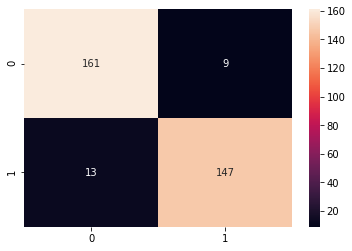

In [76]:
smatrix = confusion_matrix(y_test, mynn)
sns.heatmap(smatrix, annot=True, fmt="d")

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation


# define the model 
nn_model = Sequential([
    Dense(name = "hidden", activation='sigmoid', units = 10, input_dim = 2),
    Dense(name = "output", activation='softmax', units = 2),
])

# compile the model
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

Using TensorFlow backend.


In [15]:
nn_model.weights

[<tf.Variable 'hidden/kernel:0' shape=(2, 10) dtype=float32, numpy=
 array([[-0.13311775, -0.3292188 ,  0.18783502,  0.6061847 , -0.23438288,
         -0.04619455,  0.19049093, -0.5947534 ,  0.78166723,  0.03145228],
        [-1.4378531 , -0.5015265 , -0.15916996,  0.45389116, -0.99907964,
          0.9106861 ,  1.1526667 , -0.5646557 ,  0.41478992,  0.09024166]],
       dtype=float32)>,
 <tf.Variable 'hidden/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.02547267,  0.04010379, -0.00210395, -0.03403814,  0.11816882,
         0.18913957, -0.08002846,  0.12312075, -0.00374325,  0.06818362],
       dtype=float32)>,
 <tf.Variable 'output/kernel:0' shape=(10, 2) dtype=float32, numpy=
 array([[-0.8078545 ,  1.1641703 ],
        [-0.22765855,  0.17402709],
        [-0.409221  ,  0.47265965],
        [ 0.34905466,  0.05038613],
        [-1.2412897 ,  0.64540964],
        [ 0.5138548 , -0.75270414],
        [ 1.115923  , -0.7578821 ],
        [-0.76348656, -0.06963343],
        [ 0.695108

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [12]:

y_nn_train = []
for i in y_train:
    if i == 0:
        y_nn_train.append([1, 0])
    else:
        y_nn_train.append([0, 1])
        
y_nn_train = np.array (y_nn_train)
y_nn_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [13]:
nn_model.fit(X_train, y_nn_train, epochs = 30)

Epoch 1/30
670/670 [==============================] - 0s 42us/step - loss: 0.3969
Epoch 2/30
670/670 [==============================] - 0s 35us/step - loss: 0.3899
Epoch 3/30
670/670 [==============================] - 0s 33us/step - loss: 0.3832
Epoch 4/30
670/670 [==============================] - 0s 31us/step - loss: 0.3769
Epoch 5/30
670/670 [==============================] - 0s 34us/step - loss: 0.3708
Epoch 6/30
670/670 [==============================] - 0s 37us/step - loss: 0.3650
Epoch 7/30
670/670 [==============================] - 0s 40us/step - loss: 0.3597
Epoch 8/30
670/670 [==============================] - 0s 40us/step - loss: 0.3546
Epoch 9/30
670/670 [==============================] - 0s 36us/step - loss: 0.3497
Epoch 10/30
670/670 [==============================] - 0s 38us/step - loss: 0.3452
Epoch 11/30
670/670 [==============================] - 0s 35us/step - loss: 0.3409
Epoch 12/30
670/670 [==============================] - 0s 41us/step - loss: 0.3369
Epoch 13/30
6

In [102]:
y_nn_pred = nn_model.predict(X_test)
y_nn_pred

array([[0.55831814, 0.4416819 ],
       [0.06558513, 0.9344149 ],
       [0.6189027 , 0.38109735],
       [0.9732944 , 0.02670568],
       [0.86505616, 0.13494378],
       [0.6935592 , 0.30644074],
       [0.0516681 , 0.9483319 ],
       [0.05116377, 0.9488362 ],
       [0.07170373, 0.9282963 ],
       [0.06503239, 0.93496764],
       [0.9249719 , 0.07502811],
       [0.07385022, 0.9261498 ],
       [0.6386252 , 0.36137483],
       [0.55166715, 0.44833282],
       [0.18113428, 0.8188657 ],
       [0.3322852 , 0.66771483],
       [0.05847507, 0.941525  ],
       [0.02627799, 0.973722  ],
       [0.03700643, 0.96299356],
       [0.10599219, 0.89400774],
       [0.30619457, 0.69380546],
       [0.93677086, 0.06322914],
       [0.9243043 , 0.07569564],
       [0.6003084 , 0.39969155],
       [0.08827391, 0.9117261 ],
       [0.73792535, 0.2620746 ],
       [0.5686427 , 0.43135723],
       [0.7214619 , 0.2785381 ],
       [0.815405  , 0.18459493],
       [0.797603  , 0.20239697],
       [0.

In [68]:
y_pred_nn = []
for i in range(len(y_nn_pred)):
    if y_nn_pred[i][0] > y_nn_pred[i][1]:        
        y_pred_nn.append(0)
    else:
        y_pred_nn.append(1)

In [69]:
y_pred_nn == mynn

True

In [98]:
pred[pred < 0.5] = 0
pred[pred>0.5] = 1

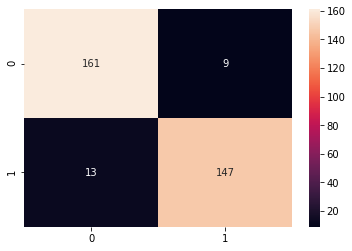

In [70]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cmatrix, annot=True, fmt="d")